## 第二章、如何对待真实样本分类

机器学习不同与规则学习。机器能否会识别图像中的花朵的种类。从机器学习角度，可以先让机器学习每朵花的样本数据，然后根据这些信息对未标识的样本数据进行分类。

#### 2.1 Iris数据集
数据包含了150$\times$4的数据（150行，4个属性，1个label标签）。
+ 每个花朵有以下四个属性（实际上花萼分为长度和宽度，花瓣分为长度和宽度）。
    - 花萼长度（sepal length） 
    - 花萼宽度（sepal width）
    - 花瓣长度（petal length）
    - 花瓣宽度（petal width）

+ 然后花的类别一共有三种。
    - 山鸢尾花（Iris Setosa）
    - 变色鸢尾花（Iris Versicolour）
    - 维吉尼亚鸢尾花（Iris Virginica）

##### 2.1.1 第一步：可视化

In [2]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
data = load_iris()

In [6]:
from matplotlib import pyplot as plt
import numpy as np

# 在sklearn中读取Iris数据
from sklearn.datasets import load_iris
data = load_iris()

# 
features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names

for t in range(3):
    if t == 0:
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t == 2:
        c = 'b'
        marker = 'x'
    plt.scatter(features[target == t, 0],
                features[target == t, 1],
                marker=marker,
                c=c)

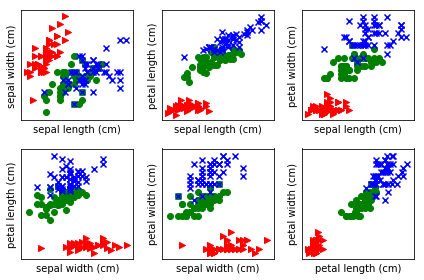

In [12]:
%matplotlib inline
fig,axes = plt.subplots(2, 3)   # subplot划分画布为（2行3列)，返回两个，一个是图对象，一个是轴对象
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

color_markers = [
        ('r', '>'),
        ('g', 'o'),
        ('b', 'x'),
        ]
for i, (p0, p1) in enumerate(pairs):
    ax = axes.flat[i]
    for t in range(3):
        c, marker = color_markers[t] # c:颜色，marker：形状
        # 绘制散点图
        ax.scatter(features[target == t, p0], features[
                    target == t, p1], marker=marker, c=c)
    
    ax.set_xlabel(feature_names[p0])
    ax.set_ylabel(feature_names[p1])
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()
fig.tight_layout()
fig.savefig('figure1.png')

##### 2.1.2 构建第一个分类模型
我们知道该数据集一共有4个特征。两两比较，共6组组合，及上面的四幅散点图。可以看到，三角形的点离其他两类较远，肉眼便可以分开，由上述代码`t=0`时，为三角形。数据集中，由`0`标识**山鸢尾花**。即，我们可以利用花瓣长度就可以将它和其他两类花分开。那么我们就要问了，**到底花瓣长度为多少时，是山鸢尾花**。
```
简易的伪代码
if petal length > ?:
    label = Iris Setosa
else:
    label = others
```

In [21]:
plength = features[:,2]  # 取出花瓣长度的数据
is_setosa = (target == 0) # 获得bool值，是山鸢尾花为True，否则为False

In [23]:
plength

array([ 1.4,  1.4,  1.3,  1.5,  1.4,  1.7,  1.4,  1.5,  1.4,  1.5,  1.5,
        1.6,  1.4,  1.1,  1.2,  1.5,  1.3,  1.4,  1.7,  1.5,  1.7,  1.5,
        1. ,  1.7,  1.9,  1.6,  1.6,  1.5,  1.4,  1.6,  1.6,  1.5,  1.5,
        1.4,  1.5,  1.2,  1.3,  1.5,  1.3,  1.5,  1.3,  1.3,  1.3,  1.6,
        1.9,  1.4,  1.6,  1.4,  1.5,  1.4,  4.7,  4.5,  4.9,  4. ,  4.6,
        4.5,  4.7,  3.3,  4.6,  3.9,  3.5,  4.2,  4. ,  4.7,  3.6,  4.4,
        4.5,  4.1,  4.5,  3.9,  4.8,  4. ,  4.9,  4.7,  4.3,  4.4,  4.8,
        5. ,  4.5,  3.5,  3.8,  3.7,  3.9,  5.1,  4.5,  4.5,  4.7,  4.4,
        4.1,  4. ,  4.4,  4.6,  4. ,  3.3,  4.2,  4.2,  4.2,  4.3,  3. ,
        4.1,  6. ,  5.1,  5.9,  5.6,  5.8,  6.6,  4.5,  6.3,  5.8,  6.1,
        5.1,  5.3,  5.5,  5. ,  5.1,  5.3,  5.5,  6.7,  6.9,  5. ,  5.7,
        4.9,  6.7,  4.9,  5.7,  6. ,  4.8,  4.9,  5.6,  5.8,  6.1,  6.4,
        5.6,  5.1,  5.6,  6.1,  5.6,  5.5,  4.8,  5.4,  5.6,  5.1,  5.1,
        5.9,  5.7,  5.2,  5. ,  5.2,  5.4,  5.1])

In [24]:
max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()
print "山鸢尾花的最大花瓣长度是：{}".format(max_setosa)
print "其他花的最小的花瓣长度是：{}".format(min_non_setosa)

山鸢尾花的最大花瓣长度是：1.9
其他花的最小的花瓣长度是：3.0


我们可以看到“分割线”应该在1.9到3之间。此处我们取`?`为2。

In [28]:
if plength < 2: print '山鸢尾花' ,else: print '其他花'

SyntaxError: invalid syntax (<ipython-input-28-37c6ddfb8b96>, line 1)